## Chapter 2 - (yes, again)

### The Dataset

First look to Huggin Face Datasets

Take a look into emotions dataset

In [1]:
# Import necessary libraries
from datasets import load_dataset

# Load the emotion dataset
emotions = load_dataset("emotion")

# Display the type and content of emotions
print(f"{type(emotions)}\n")
print(f"{emotions}\n")

<class 'datasets.dataset_dict.DatasetDict'>

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})



In the train_ds.column_names, the data type of text column is string, while the label column is a special ClassLabel object that contains information about the class names and their mapping to integers.

In [2]:
# Access the training dataset
train_ds = emotions["train"]

# Display some information
print(f"Number of training samples:\n{len(train_ds)}\n")
print(f"Access a single example by its index:\n{train_ds[0]}\n")
print(f"Column names:\n{train_ds.column_names}\n")
print(f"Show the features:\n{train_ds.features}\n")
print(f"First 5 rows of the training dataset:\n{train_ds[:5]}\n")
print(f"First 5 rows of the column 'text':\n{train_ds['text'][:5]}\n")

# Display the type and content of the training dataset
print(f"{type(train_ds)}\n")
print(f"{train_ds}\n")

Number of training samples:
16000

Access a single example by its index:
{'text': 'i didnt feel humiliated', 'label': 0}

Column names:
['text', 'label']

Show the features:
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

First 5 rows of the training dataset:
{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}

First 5 rows of the column 'text':
['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still

Load datasets in various formats:

- load_dataset("csv", data_files="my_file.csv")
- load_dataset("text", data_files="my_file.txt")
- load_dataset("json", data_files="my_file.jsonl")

### From Datasets to DataFrames

Convert to DataFrame with Pandas so we can access high-level APIs for data visualization

Datasets provides a set_format method that allows us to change the output format of the Dataset. Note that this dows not change the underlyins data format (which is an Arrow table), and you can switch to another format later if needed.

In [66]:
# Import necessary libraries
import pandas as pd

# Display the actual type of the dataset
print(f"Actual type of the dataset:\n{type(train_ds)}\n")

# Convert the training dataset to a pandas DataFrame
emotions.set_format(type="pandas")

# Display the type of the dataset after conversion
print(f"Type of the dataset after conversion:\n{type(emotions)}\n")

# Convert the training dataset to a pandas DataFrame
emotions_df = emotions["train"][:]

# Display the type of the DataFrame
print(f"Type of the DataFrame:\n{type(emotions_df)}\n")

# Display the first few rows of the DataFrame
print(f"DataFrame pandas:\n{emotions_df.head()}\n")

# Extract the label ID of the fourth entry in the DataFrame
label_id = int(emotions_df["label"].iloc[4])

# Display the type and value of the label ID
print(f"Type of label_id: {type(label_id)}")
print(f"Value of label_id: {label_id}\n")

# Convert the label ID to its corresponding string representation
label_str = emotions["train"].features["label"].int2str(label_id)

# Display the type and value of the label string
print(f"Type of label_str: {type(label_str)}")
print(f"Value of label_str: {label_str}\n")

# Method to convert integer labels to string labels
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

# Convert integer labels to string labels
emotions_df["label"] = emotions_df["label"].apply(label_int2str)

# Display the first few rows of the DataFrame with string labels
print(f"DataFrame with string labels:\n{emotions_df.head()}\n")

Actual type of the dataset:
<class 'datasets.arrow_dataset.Dataset'>

Type of the dataset after conversion:
<class 'datasets.dataset_dict.DatasetDict'>

Type of the DataFrame:
<class 'pandas.core.frame.DataFrame'>

DataFrame pandas:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

Type of label_id: <class 'int'>
Value of label_id: 3

Type of label_str: <class 'str'>
Value of label_str: anger

DataFrame with string labels:
                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever f

### Looking at the Class Distribution

Examine the distribution of examples across the classes. A dataset with a skewed class distribution might require a different treatment.

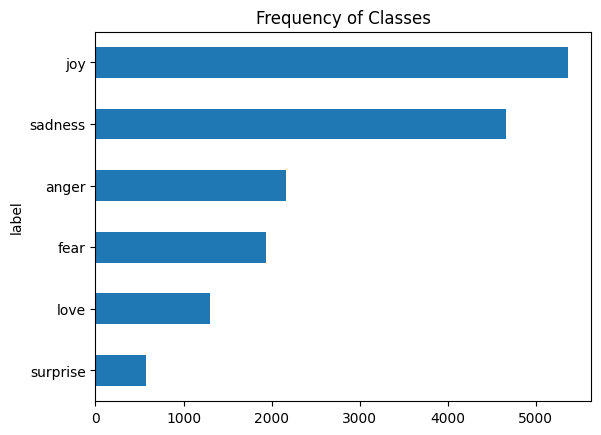

In [4]:
import matplotlib.pyplot as plt

emotions_df["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

### From Text to Tokens - Subword Tokenization

The text must been tokenized and encoded as numerical vectors. Tokenization is the step of breaking down a string into the atomic units used in the model.

The basic idea of subword tokenization is to combine the best aspects of character and word tokenization.

The are several subword tokenization algorithms. WordPiece is used by the BERT and DistilBERT tokenizers.

Texto -> Tokens -> IDs -> IDs alimentan al modelo

In [5]:
from transformers import AutoTokenizer, DistilBertTokenizer

model_ckpt = "distilbert-base-uncased"

# Load the AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Display information about the tokenizer
print(f"Tokenizer type:\n{type(tokenizer)}\n")
print(f"Tokenizer configuration:\n{tokenizer}\n")

# Extra information about the tokenizer
print(f"Tokenizer vocabulary size:\n{tokenizer.vocab_size}\n")
print(f"Tokenizer special tokens:\n{tokenizer.special_tokens_map}\n")
print(f"Tokenizer model max length:\n{tokenizer.model_max_length}\n")

# Load the DistilBert tokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

# Display information about the DistilBert tokenizer
print(f"DistilBert Tokenizer type:\n{type(distilbert_tokenizer)}\n")
print(f"DistilBert Tokenizer configuration:\n{distilbert_tokenizer}\n")

# Extra information about the DistilBert tokenizer
print(f"DistilBert Tokenizer vocabulary size:\n{distilbert_tokenizer.vocab_size}\n")
print(f"DistilBert Tokenizer special tokens:\n{distilbert_tokenizer.special_tokens_map}\n")
print(f"DistilBert Tokenizer model max length:\n{distilbert_tokenizer.model_max_length}\n")

Tokenizer type:
<class 'transformers.models.distilbert.tokenization_distilbert_fast.DistilBertTokenizerFast'>

Tokenizer configuration:
DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=Fals

In [6]:
text = "Tokenizing text is a core task of NLP."

# Encode with tokenizer (AutoTokenizer)
encoded_text = tokenizer(text)

# Display information about the encoded_text
print(f"encoded_text type:\n{type(encoded_text)}\n")
print(f"encoded_text content:\n{encoded_text}\n")

# Encode with DistilBert tokenizer
encoded_text_distilbert = distilbert_tokenizer(text)

# Display information about the encoded_text_distilbert
print(f"encoded_text_distilbert type:\n{type(encoded_text_distilbert)}\n")
print(f"encoded_text_distilbert content:\n{encoded_text_distilbert}\n")

encoded_text type:
<class 'transformers.tokenization_utils_base.BatchEncoding'>

encoded_text content:
{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

encoded_text_distilbert type:
<class 'transformers.tokenization_utils_base.BatchEncoding'>

encoded_text_distilbert content:
{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}



In [7]:
# Display the information inside encoded_text
print(f"encoded_text type:\n{type(encoded_text)}\n")
print(f"encoded_text keys:\n{encoded_text.keys()}\n")
print(f"encoded_text input_ids:\n{encoded_text['input_ids']}\n")
print(f"encoded_text attention_mask:\n{encoded_text['attention_mask']}\n")

# Display the information inside encoded_text_distilbert
print(f"encoded_text_distilbert type:\n{type(encoded_text_distilbert)}\n")
print(f"encoded_text_distilbert keys:\n{encoded_text_distilbert.keys()}\n")
print(f"encoded_text_distilbert input_ids:\n{encoded_text_distilbert['input_ids']}\n")
print(f"encoded_text_distilbert attention_mask:\n{encoded_text_distilbert['attention_mask']}\n")

encoded_text type:
<class 'transformers.tokenization_utils_base.BatchEncoding'>

encoded_text keys:
dict_keys(['input_ids', 'attention_mask'])

encoded_text input_ids:
[101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102]

encoded_text attention_mask:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

encoded_text_distilbert type:
<class 'transformers.tokenization_utils_base.BatchEncoding'>

encoded_text_distilbert keys:
dict_keys(['input_ids', 'attention_mask'])

encoded_text_distilbert input_ids:
[101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102]

encoded_text_distilbert attention_mask:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]



Both tokenizers are almost the same object, we're going to continue with distilbert_tokenizer but take care about problems if you are going to use another models.

In [8]:
# Convert input IDs back to tokens using the AutoTokenizer
tokens = distilbert_tokenizer.convert_ids_to_tokens(encoded_text_distilbert["input_ids"])

# Display the tokens
print(f"tokens type:\n{type(tokens)}\n")
print(f"tokens content:\n{tokens}\n")

# Decode the tokens back to text using the AutoTokenizer
decoded_text = distilbert_tokenizer.decode(encoded_text_distilbert["input_ids"])

# Display the decoded text
print(f"decoded_text type:\n{type(decoded_text)}\n")
print(f"decoded_text content:\n{decoded_text}\n")

tokens type:
<class 'list'>

tokens content:
['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']

decoded_text type:
<class 'str'>

decoded_text content:
[CLS] tokenizing text is a core task of nlp. [SEP]



Complete tokenization process:

1. Tokenize a string (convert string to IDs that is useful for the model)
2. Convert back IDs to tokens (optional)
3. Convert directly IDs to string

In [9]:
# Complete tokenization process
text = "This is a test sentence for tokenization."

# Tokenize the text using the distilbert_tokenizer
tokenized_text = distilbert_tokenizer(text)

# Display the tokenized text
print(f"tokenized_text type:\n{type(tokenized_text)}\n")
print(f"tokenized_text content:\n{tokenized_text}\n")

# Convert the input IDs back to tokens
tokens_text = distilbert_tokenizer.convert_ids_to_tokens(tokenized_text["input_ids"])

# Display the tokens
print(f"tokens_text type:\n{type(tokens_text)}\n")
print(f"tokens_text content:\n{tokens_text}\n")

# Convert the tokens back to text
decoded_text = distilbert_tokenizer.decode(tokenized_text["input_ids"])

# Display the decoded text
print(f"decoded_text type:\n{type(decoded_text)}\n")
print(f"decoded_text content:\n{decoded_text}\n")


tokenized_text type:
<class 'transformers.tokenization_utils_base.BatchEncoding'>

tokenized_text content:
{'input_ids': [101, 2023, 2003, 1037, 3231, 6251, 2005, 19204, 3989, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

tokens_text type:
<class 'list'>

tokens_text content:
['[CLS]', 'this', 'is', 'a', 'test', 'sentence', 'for', 'token', '##ization', '.', '[SEP]']

decoded_text type:
<class 'str'>

decoded_text content:
[CLS] this is a test sentence for tokenization. [SEP]



### Tokenizing the Whole Dataset

We'll use the map() methos of the DatasetDict object to tokenize the whole corpus. This methos is a convenient way to apply a processing function to each element in the dataset. So, map() methos can also be used to create new rows and columns.

In [10]:
def tokenize(batch):
    """
    Tokenizes a batch of texts using the DistilBert tokenizer.

    Args:
        batch (dict): A dictionary containing a list of texts under the key "text".capitalize
        padding (bool): Pad the sequences with zeros to the size of the longest sequence in the batch
        truncation (bool): Truncate the sequences to the maximum model's context size
    Returns:
        dict: A dictionary containing the tokenized inputs, including input IDs and attention masks.

    """
    return distilbert_tokenizer(batch["text"], padding=True, truncation=True)

In the line:

emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

The map() method operates individually on every example in the corpus. So batched=True will encode the information in batches, but batches_size=None so, our tokenize() functions will be applies on the full dataset as a single batch. This ensures that the input tensors and attentions masks have the same shape globally. This add new input_ids and attentions_mask columns to the dataset.

In [11]:
# Show the emotions dataset before change the format

# Generate a test object to test the tokenize function
test_text = emotions["train"][:2]

# Display the test object
print(f"Test object type:\n{type(test_text)}\n")
print(f"Test object content:\n{test_text}\n")

# Tokenize the test object
# tokenized_test_text = tokenize(test_text)
# This fails because:
#
# text input must be of type `str` (single example), `List[str]` 
# (batch or single pretokenized example) or `List[List[str]]` 
# (batch of pretokenized examples).
#
# So, we need change the format


# Convert emotions pandas DataFrame back to a Hugging Face Dataset
emotions.set_format(type="torch")

# Generate a test object to test the tokenize function
test_text = emotions["train"][:2]

# Display the test object
print(f"Test object type:\n{type(test_text)}\n")
print(f"Test object content:\n{test_text}\n")

# Tokenize the test object
tokenized_test_text = tokenize(test_text)

# Display the tokenized test object
print(f"Tokenized test object type:\n{type(tokenized_test_text)}\n")
print(f"Tokenized test object content:\n{tokenized_test_text}\n")

# Tokenize the entire training dataset
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

# Display the type and content of the emotions_encoded dataset
print(f"emotions_encoded type:\n{type(emotions_encoded)}\n")
print(f"emotions_encoded content:\n{emotions_encoded}\n")

# Display the first few rows of the encoded dataset
print(f"First 5 rows of the encoded dataset:\n{emotions_encoded['train'][:5]}\n")

# Display the column names of the encoded dataset
print(f"Column names of the encoded dataset:\n{emotions_encoded['train'].column_names}\n")


Test object type:
<class 'pandas.core.frame.DataFrame'>

Test object content:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0

Test object type:
<class 'dict'>

Test object content:
{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'], 'label': tensor([0, 0])}

Tokenized test object type:
<class 'transformers.tokenization_utils_base.BatchEncoding'>

Tokenized test object content:
{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Training a Text Classifier

Models like DistilBERT are pretrained to predict masked words in a sequence of text.

There are two options to train such a model on the dataset:

- Feature extraction: Use the hiddens states as features and train a classifier on them, whitout modifing the pretrained model.
- Fine-tuning: Train the whole model ent-to-end, which also updates the parameters of the pretrained model.

#### Transformers as Feature Extractors

Useful when not GPU is available. The advantage of this approach is taht we can quickly train a small or shallow model. We freeze the body's weight during training and only use the hidden states as features for the classifier.

In [12]:
# Load the weights of the pretrained model.

# Import necessary libraries
from transformers import AutoModel

# Checkpoint for the model
model_ckpt = "distilbert-base-uncased"

# Device to use for the model
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cuda"

# Load the pretrained model
# .to(device) moves the model to the specified device (CPU or GPU)
model = AutoModel.from_pretrained(model_ckpt).to(device)

# Display the type and configuration of the model
print(f"Model type:\n{type(model)}\n")
# Display the model's configuration
print(f"Model configuration:\n{model.config}\n")
# Display the model's architecture
print(f"Model architecture:\n{model}\n")
# Display the model's number of parameters
print(f"Model number of parameters:\n{model.num_parameters()}\n")
# Display the model's vocabulary size
print(f"Model vocabulary size:\n{model.config.vocab_size}\n")
# Display the model's hidden size
print(f"Model hidden size:\n{model.config.hidden_size}\n")
# Display the model's number of hidden layers
print(f"Model number of hidden layers:\n{model.config.num_hidden_layers}\n")
# Display the model's number of attention heads
print(f"Model number of attention heads:\n{model.config.num_attention_heads}\n")
# Display the model's maximum position embeddings
print(f"Model maximum position embeddings:\n{model.config.max_position_embeddings}\n")

2025-06-15 10:28:30.013775: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 10:28:30.188009: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750004910.276274    4015 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750004910.314420    4015 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750004910.618526    4015 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750004910.618586    4015 computation_placer.cc:177] computation placer already registered. Please che

Model type:
<class 'transformers.models.distilbert.modeling_distilbert.DistilBertModel'>

Model configuration:
DistilBertConfig {
  "_attn_implementation_autoset": true,
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "vocab_size": 30522
}


Model architecture:
DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
  

The AutoModel class converts the token encodings to embeddings, and then, feeds them through the encoder stack to return the hidden states. Take a look at how how we can extract these states from our corpus.

1. Text -> IDs
2. IDs -> PyTorch tensors

or

1. Text -> PyTorch tensors

Directly with AutoTokenizer with return_tensors argument.

In [13]:
# Import necessary libraries
import torch

# Set some text
text = "this is a test"

# Tokenize the text using the AutoTokenizer
inputs = tokenizer(text)

# Display the type and content of the inputs
print(f"Inputs type:\n{type(inputs)}\n")
print(f"Inputs content:\n{inputs}\n")

# Transform the inputs to tensors and move them to the specified device
inputs = {key: torch.tensor(value).unsqueeze(0).to(device) for key, value in inputs.items()}

# Display the type and content of the inputs after conversion
print(f"Inputs after conversion type:\n{type(inputs)}\n")
print(f"Inputs after conversion content:\n{inputs}\n")
print(f"Input tensor shape:\n{inputs['input_ids'].shape}\n")
print(f"Inputs are in: {inputs['input_ids'].device}\n")
print(f"Shape is [batch_size, n_tokens]\n")

# Tokenize the text using the AutoTokenizer and return PyTorch tensors
inputs = tokenizer(text, return_tensors="pt").to(device)

# Display the type and content of the inputs after conversion
print(f"Inputs after conversion type:\n{type(inputs)}\n")
print(f"Inputs after conversion content:\n{inputs}\n")
print(f"Input tensor shape:\n{inputs['input_ids'].shape}\n")
print(f"Inputs keys:\n{inputs.keys()}\n")
print(f"Shape is [batch_size, n_tokens]")

Inputs type:
<class 'transformers.tokenization_utils_base.BatchEncoding'>

Inputs content:
{'input_ids': [101, 2023, 2003, 1037, 3231, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]}

Inputs after conversion type:
<class 'dict'>

Inputs after conversion content:
{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}

Input tensor shape:
torch.Size([1, 6])

Inputs are in: cuda:0

Shape is [batch_size, n_tokens]

Inputs after conversion type:
<class 'transformers.tokenization_utils_base.BatchEncoding'>

Inputs after conversion content:
{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}

Input tensor shape:
torch.Size([1, 6])

Inputs keys:
dict_keys(['input_ids', 'attention_mask'])

Shape is [batch_size, n_tokens]


Important, move to the correct device the model and tensors.

Gradient: In PyTorch, a gradient indicates hoy much changes a function again the weights. They're calculated in the backpropagation process.

In [14]:
# Display the device of the input tensors
print(f"Inputs are in: {inputs['input_ids'].device}\n")

# Cantidad de items en input
print(f"Number of items in input:\n{len(inputs.items())}\n")

# Move the tensors to the specified device
# Set the device to CPU or GPU
device = "cuda"

# Move the inputs to the specified device
inputs = {key: value.to(device) for key, value in inputs.items()}

outputs_with_grads = model(**inputs)

# Display the type and content of the outputs
print(f"Outputs with gradients type:\n{type(outputs_with_grads)}\n")
print(f"Outputs with gradients content:\n{outputs_with_grads}\n")

with torch.no_grad():
    outputs = model(**inputs)

# Display the type and content of the outputs
print(f"Outputs type:\n{type(outputs)}\n")
print(f"Outputs content:\n{outputs}\n")

Inputs are in: cuda:0

Number of items in input:
2

Outputs with gradients type:
<class 'transformers.modeling_outputs.BaseModelOutput'>

Outputs with gradients content:
BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0', grad_fn=<NativeLayerNormBackward0>), hidden_states=None, attentions=None)

Outputs type:
<class 'transformers.modeling_outputs.BaseModelOutput'>

Outputs content:
BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
     

During inference (evaluation), you no longer need to update the model weights. Only need:

1. Feed the model with new data.
2. Get predictions.
3. Measure how doing model.

So calculating gradients is pointless and inefficient.

Then, required_grad = True, means:
1. If you do .backward() the gradients will be calculated.
2. Tensors have .grad_fn attribute.

In [15]:
print(f"Outputs with grads - last_hidden_state - required_grad:\n{type(outputs_with_grads.last_hidden_state.requires_grad)}\n")
print(f"Outputs with grads - last_hidden_state - required_grad:\n{outputs_with_grads.last_hidden_state.requires_grad}\n")

print(f"Outputs with grads - last_hidden_state - grad_fn:\n{type(outputs_with_grads.last_hidden_state.grad_fn)}\n")
print(f"Outputs with grads - last_hidden_state - grad_fn:\n{outputs_with_grads.last_hidden_state.grad_fn}\n")

print(f"Outputs without grads - last_hidden_state - required_grad:\n{type(outputs.last_hidden_state.requires_grad)}\n")
print(f"Outputs without grads - last_hidden_state - required_grad:\n{outputs.last_hidden_state.requires_grad}\n")

print(f"Outputs without grads - last_hidden_state - grad_fn:\n{type(outputs.last_hidden_state.grad_fn)}\n")
print(f"Outputs without grads - last_hidden_state - grad_fn:\n{outputs.last_hidden_state.grad_fn}\n")

Outputs with grads - last_hidden_state - required_grad:
<class 'bool'>

Outputs with grads - last_hidden_state - required_grad:
True

Outputs with grads - last_hidden_state - grad_fn:
<class 'NativeLayerNormBackward0'>

Outputs with grads - last_hidden_state - grad_fn:

Outputs without grads - last_hidden_state - required_grad:
<class 'bool'>

Outputs without grads - last_hidden_state - required_grad:
False

Outputs without grads - last_hidden_state - grad_fn:
<class 'NoneType'>

Outputs without grads - last_hidden_state - grad_fn:
None



The current model returns only one attribute, which is the last hidden state:

In [16]:
# Display the size of the last hidden state
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

768-dimensional vector is returned for each of the 6 input tokens.

For classifications tasks, it is common practice to just use the hidden state associated with the CLS token as the input feature.

In [17]:
# Extract token indexing as follows:
print(f"New token indexing:\n{outputs.last_hidden_state[:,0]}\n")

# Display the object with last_hidden_state and without tokens
print(f"Outputs with last_hidden_state and without tokens type:\n{type(outputs.last_hidden_state[:,0])}\n")
print(f"Outputs with last_hidden_state and without tokens:\n{outputs.last_hidden_state[:,0]}\n")

New token indexing:
tensor([[-1.5651e-01, -1.8620e-01,  5.2777e-02, -1.0634e-01, -1.3163e-02,
         -2.6944e-01,  9.2270e-02,  1.5865e-01, -9.8675e-02, -2.9572e-01,
         -1.3788e-01, -3.8061e-02, -5.3617e-02,  1.3045e-01,  3.9713e-02,
          8.6893e-02,  2.5087e-02,  8.6177e-03,  2.5243e-01, -1.3678e-01,
         -1.2137e-01, -1.3896e-01, -1.3426e-01, -9.0844e-02,  3.0509e-02,
         -3.8619e-02,  1.1485e-01, -5.7996e-02,  1.0131e-01,  9.7920e-02,
          3.8742e-03,  1.1950e-01, -6.6339e-02, -2.1257e-02,  1.3090e-01,
          2.6520e-02,  2.3624e-01,  5.0220e-02,  1.3503e-02, -2.1380e-02,
         -8.8323e-02, -9.8360e-02,  2.2675e-01, -2.4940e-02, -1.6261e-01,
         -8.3787e-02, -1.9629e+00, -1.4541e-01, -1.5582e-01, -3.5487e-01,
         -4.5971e-02,  2.0034e-01,  1.3080e-02,  4.9650e-01,  1.0587e-01,
          1.2080e-01, -1.9118e-01,  3.8280e-01,  1.7121e-02, -1.6628e-02,
          2.1525e-01,  4.4381e-02,  3.9333e-03,  3.5416e-02,  1.2238e-01,
          2.1459e-

In [18]:
# Function to extract the hidden states of a batch
def extract_hidden_states(batch, device="cpu"):
    
    # Place model inputs on the specified device
    inputs = {key: value.to(device) for key, value in batch.items() if key in tokenizer.model_input_names}

    # Extract last hidden states from the model
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

The model expects tensors as inputs, the next thing to do is convert the input_ids and attention_mask columns to the torch format.

In [19]:
# Display the type and content of emotions_encoded
print(f"emotions_encoded type:\n{type(emotions_encoded)}\n")
print(f"emotions_encoded content:\n{emotions_encoded}\n")

# Apply the formatter to converto the dataset to PyTorch tensors
emotions_encoded.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Display the type and content of emotions_encoded after setting the format
print(f"emotions_encoded after set_format type:\n{type(emotions_encoded)}\n")
print(f"emotions_encoded after set_format content:\n{emotions_encoded}\n")

emotions_encoded type:
<class 'datasets.dataset_dict.DatasetDict'>

emotions_encoded content:
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

emotions_encoded after set_format type:
<class 'datasets.dataset_dict.DatasetDict'>

emotions_encoded after set_format content:
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})



Now, we can then go ahead and extract the hidden states across all splits in one go

In [20]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

# Display the type and content of emotions_hidden
print(f"emotions_hidden type:\n{type(emotions_hidden)}\n")
print(f"emotions_hidden content:\n{emotions_hidden}\n")

emotions_hidden type:
<class 'datasets.dataset_dict.DatasetDict'>

emotions_hidden content:
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})



The hidden states:

The text in the dataset first is transformed into tokens and then into hidden states.

In models like DistilBERT, the text go ahead for multiple layers (transformers). In each layer it generates an intermediate representations from the text ant the results are the hidden states.

The hidden states are vectors that have the context of each token with his relationship with another tokens in the sentence.

The preprocessed dataset now contains all the information we need to train a classifier on it. The hidden states as input features and the labels as targets.

In [21]:
# Show emotions_hidden column names
print(f"emotions_hidden column names:\n{emotions_hidden['train'].column_names}\n")

emotions_hidden column names:
['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']



In [22]:
# Create the arrays with the hidden states and labels

# Import necessary libraries
import numpy as np

# Create the hidden states array
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])

# Create the labels array
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])

# Display the shapes of the arrays
print(f"X_train shape: {X_train.shape}\n")
print(f"X_valid shape: {X_valid.shape}\n")
print(f"y_train shape: {y_train.shape}\n")
print(f"y_valid shape: {y_valid.shape}\n")

X_train shape: (16000, 768)

X_valid shape: (2000, 768)

y_train shape: (16000,)

y_valid shape: (2000,)



Visualizing the hidden states in 768 dimensions is tricky. Use UMAP algorithm to project the vectors down to 2D. Since UMAP works best when the featues are scales to lie in the [0, 1] interval, we will first apply a MinMaxScaler and then use UMAP implementation.

In [23]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0, 1] range
X_scaled = MinMaxScaler().fit_transform(X_train)

# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

/home/notrootusername/Documents/Desarrollo/research-machine-learning/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,X,Y,label
0,4.294158,6.287450,0
1,-3.020116,4.893899,0
2,5.497165,2.882786,3
3,-2.368976,2.834155,2
4,-3.155425,3.028065,3


The result of the UMAP process is an array with the same number of training samples, but only 2 features instead of the 768 we started with.

Let's investigate the compressed data:

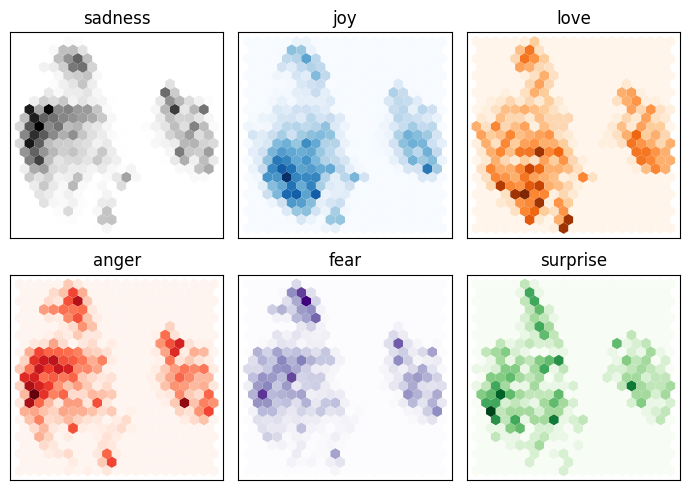

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

These are only projections onto a lower-dimensional space. Just because some categories overlap does not mean that they are not separable in the original space.

### Training a simple classifier

Use hidden states to train a logistic regression model with Scikit-learn.

In [25]:
from sklearn.linear_model import LogisticRegression

# Increase max_iter to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.634

In [26]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

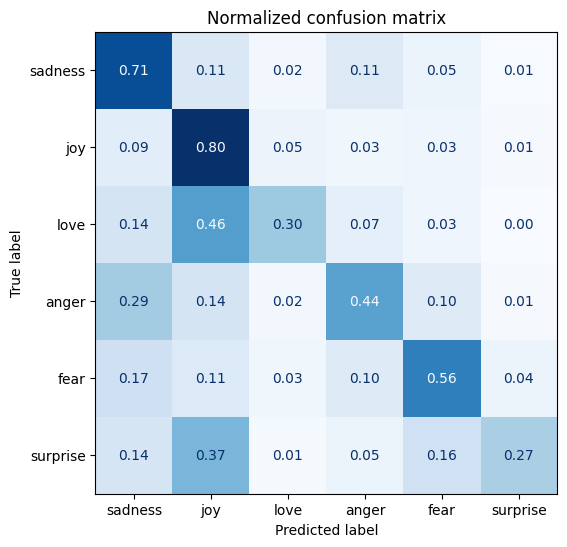

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

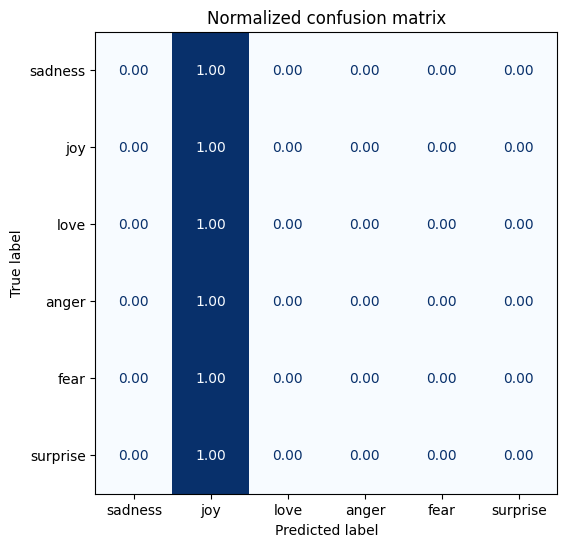

In [28]:
y_preds_dummy = dummy_clf.predict(X_valid)
plot_confusion_matrix(y_preds_dummy, y_valid, labels)

### Fine-Tuning Transformers

Loading a pretrained model

The diference between AutoModel and AutoModelForSequenceClassification is that AutoModelForSequenceClasification has a classifications head on top of the pretrained model outputs, which can be easily trained with the base model.

In [29]:
from transformers import AutoModelForSequenceClassification

# Define the number of labels for the classification task
num_labels = 6

# Load the pretrained model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

# Display the type and configuration of the model
print(f"Model type:\n{type(model)}\n")
# Display the model's configuration
print(f"Model configuration:\n{model.config}\n")
# Display the model's architecture
print(f"Model architecture:\n{model}\n")
# Display the model's number of parameters
print(f"Model number of parameters:\n{model.num_parameters()}\n")
# Display the model's vocabulary size
print(f"Model vocabulary size:\n{model.config.vocab_size}\n")
# Display the model's hidden size
print(f"Model hidden size:\n{model.config.hidden_size}\n")
# Display the model's number of hidden layers
print(f"Model number of hidden layers:\n{model.config.num_hidden_layers}\n")
# Display the model's number of attention heads
print(f"Model number of attention heads:\n{model.config.num_attention_heads}\n")
# Display the model's maximum position embeddings
print(f"Model maximum position embeddings:\n{model.config.max_position_embeddings}\n")
# Display the model's number of labels
print(f"Model number of labels:\n{model.config.num_labels}\n")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model type:
<class 'transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification'>

Model configuration:
DistilBertConfig {
  "_attn_implementation_autoset": true,
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "vocab_size": 30522
}


Model architecture:
DistilBertForSeq

#### Defining the performance metrics

To monitor metrics during training, we need to define a compute_metrics() function for the Trainer.

In [30]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels=pred.label_ids
    preds=pred.predictions.argmax(-1)
    f1=f1_score(labels, preds, average="weighted")
    acc=accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}



TrainingArguments class stores a lot of information and gives you fine-grained control over the training and evaluation.

In [31]:
from transformers import Trainer, TrainingArguments

batch_size = 16
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
use_cpu_var = False
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    disable_tqdm=False,
    logging_steps=logging_steps,
    log_level="error",
    use_cpu=use_cpu_var,
)

# Display the training arguments type and content
print(f"Training arguments type:\n{type(training_args)}\n")
print(f"Training arguments content:\n{training_args}\n")

Training arguments type:
<class 'transformers.training_args.TrainingArguments'>

Training arguments content:
TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


With TrainingArguments ready, we can instantiate and fine-tune oru model with the Trainer.

In [32]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    tokenizer=tokenizer
)

# Display the trainer type and content
print(f"Trainer type:\n{type(trainer)}\n")
print(f"Trainer content:\n{trainer}\n")

Trainer type:
<class 'transformers.trainer.Trainer'>

Trainer content:



/tmp/ipykernel_4015/3765014891.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [33]:
# Train the model
trainer.train()

Step,Training Loss
1000,0.508500
2000,0.146900


TrainOutput(global_step=2000, training_loss=0.3276598663330078, metrics={'train_runtime': 154.9333, 'train_samples_per_second': 206.54, 'train_steps_per_second': 12.909, 'total_flos': 720342861696000.0, 'train_loss': 0.3276598663330078, 'epoch': 2.0})

In [34]:
preds_output = trainer.predict(emotions_encoded["validation"])

# Display the type and content of the predictions output
print(f"Predictions output type:\n{type(preds_output)}\n")
print(f"Predictions output content:\n{preds_output}\n")

# Display the predictions output predictions
print(f"Predictions output predictions type:\n{type(preds_output.predictions)}\n")
print(f"Predictions output predictions shape:\n{preds_output.predictions.shape}\n")

# Display the metrics from the predictions output
print(f"Predictions output metrics type:\n{type(preds_output.metrics)}\n")
print(f"Predictions output metrics content:\n{preds_output.metrics}\n")

Predictions output type:
<class 'transformers.trainer_utils.PredictionOutput'>

Predictions output content:
PredictionOutput(predictions=array([[ 5.9236236 , -1.5552865 , -1.2233666 , -1.9015224 , -1.3691052 ,
        -2.3363574 ],
       [ 5.946657  , -1.6508031 , -1.673611  , -1.8660327 , -1.2506481 ,
        -2.204702  ],
       [-1.4144293 ,  2.8840804 ,  3.8971558 , -2.0328953 , -2.7883658 ,
        -2.1228406 ],
       ...,
       [-1.732135  ,  6.2243576 , -0.5337916 , -1.5277445 , -2.4072678 ,
        -1.848125  ],
       [-2.1041255 ,  3.910858  ,  3.3874571 , -2.4692826 , -2.682261  ,
        -1.8318734 ],
       [-1.9957654 ,  6.146787  , -0.70867276, -1.6743792 , -2.2505975 ,
        -1.3585092 ]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.15997928380966187, 'test_accuracy': 0.9375, 'test_f1': 0.9373187834597262, 'test_runtime': 2.1911, 'test_samples_per_second': 912.766, 'test_steps_per_second': 57.048})

Predictions output predictio

In [35]:
preds_output.metrics

{'test_loss': 0.15997928380966187,
 'test_accuracy': 0.9375,
 'test_f1': 0.9373187834597262,
 'test_runtime': 2.1911,
 'test_samples_per_second': 912.766,
 'test_steps_per_second': 57.048}

In [36]:
y_preds = np.argmax(preds_output.predictions, axis=1)

# Display the type and content of the predictions
print(f"y_preds type:\n{type(y_preds)}\n")
print(f"y_preds content:\n{y_preds}\n")
print(f"y_preds shape:\n{y_preds.shape}\n")

y_preds type:
<class 'numpy.ndarray'>

y_preds content:
[0 0 2 ... 1 1 1]

y_preds shape:
(2000,)



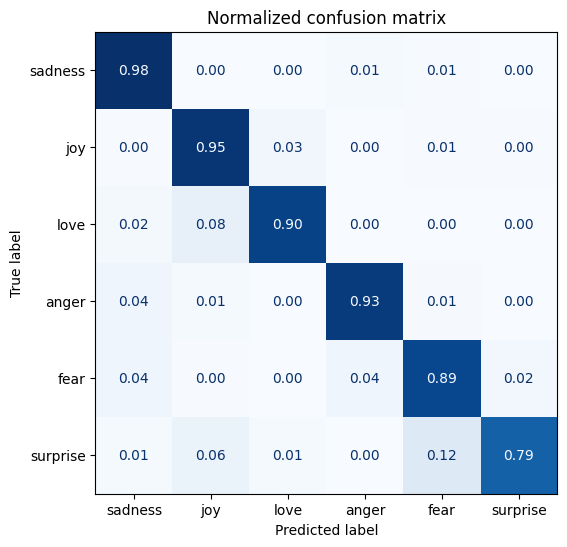

In [37]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [38]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {key: value.to(device) for key, value in batch.items() if key in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device), reduction="none")

    return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

In [39]:
# Convert our dataset to PyTorch tensors
emotions_encoded.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label,
    batched=True,
    batch_size=16,
)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [40]:
emotions_encoded.set_format(type="pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = df_test["predicted_label"].apply(label_int2str)

In [41]:
df_test.sort_values("loss", ascending=False).head(40)

,text,label,predicted_label,loss
1870,i guess i feel betrayed because i admired him ...,joy,sadness,7.666358
1963,i called myself pro life and voted for perry w...,joy,sadness,7.549253
1500,i guess we would naturally feel a sense of lon...,anger,sadness,7.176697
1801,i feel that he was being overshadowed by the s...,love,sadness,7.016951
1509,i guess this is a memoir so it feels like that...,joy,fear,6.928365
177,im sure much of the advantage is psychological...,sadness,joy,6.540781
1840,id let you kill it now but as a matter of fact...,joy,fear,6.295106
1950,i as representative of everything thats wrong ...,surprise,sadness,5.835070
405,i have been feeling extraordinarily indecisive...,fear,joy,5.821003
1683,i had applied for a job and they had assured m...,anger,joy,4.867187


In [42]:
df_test.sort_values("loss", ascending=True).head(20)

,text,label,predicted_label,loss
133,i and feel quite ungrateful for it but i m loo...,sadness,sadness,0.002081
1502,i feel ungrateful for stupid shit like,sadness,sadness,0.002114
876,i feel like the cool mom,joy,joy,0.002117
669,i am not feeling very joyful today its been a ...,joy,joy,0.002129
264,i am left feeling underwhelmed and ungrateful,sadness,sadness,0.002135
1873,i feel practically virtuous this month i have ...,joy,joy,0.002137
716,im feeling pretty cool calm and collected and ...,joy,joy,0.002153
1310,i feel like an ungrateful asshole,sadness,sadness,0.002165
1621,i feel so disturbed and unsettled that i m not...,sadness,sadness,0.002169
866,i feel quite jaded and unenthusiastic about li...,sadness,sadness,0.002172


In [48]:
model.save_pretrained("./distilbert-base-uncase-finetuned-emotion")
tokenizer.save_pretrained("./distilbert-base-uncase-finetuned-emotion")

('./distilbert-base-uncase-finetuned-emotion/tokenizer_config.json',
 './distilbert-base-uncase-finetuned-emotion/special_tokens_map.json',
 './distilbert-base-uncase-finetuned-emotion/vocab.txt',
 './distilbert-base-uncase-finetuned-emotion/added_tokens.json',
 './distilbert-base-uncase-finetuned-emotion/tokenizer.json')

In [49]:
from transformers import pipeline

model_id = "./distilbert-base-uncase-finetuned-emotion"
tokenizer_id = "./distilbert-base-uncase-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id, tokenizer=tokenizer_id)

In [65]:
# Display the type and content of the classifier
print(f"Classifier type:\n{type(classifier)}\n")
print(f"Classifier content:\n{classifier}\n")

Classifier type:
<class 'transformers.pipelines.text_classification.TextClassificationPipeline'>

Classifier content:



In [52]:
results = classifier("I feel very happy today, but I am also a bit sad about the weather.")

In [ ]:
results

[{'label': 'LABEL_1', 'score': 0.9973280429840088}]

In [60]:
preds = classifier("I feel bad.", return_all_scores=True)

In [61]:
preds

[[{'label': 'LABEL_0', 'score': 0.997016191482544},
  {'label': 'LABEL_1', 'score': 0.00101561495102942},
  {'label': 'LABEL_2', 'score': 0.0005554858944378793},
  {'label': 'LABEL_3', 'score': 0.0006471032393164933},
  {'label': 'LABEL_4', 'score': 0.0005158077692613006},
  {'label': 'LABEL_5', 'score': 0.00024968403158709407}]]

In [64]:
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

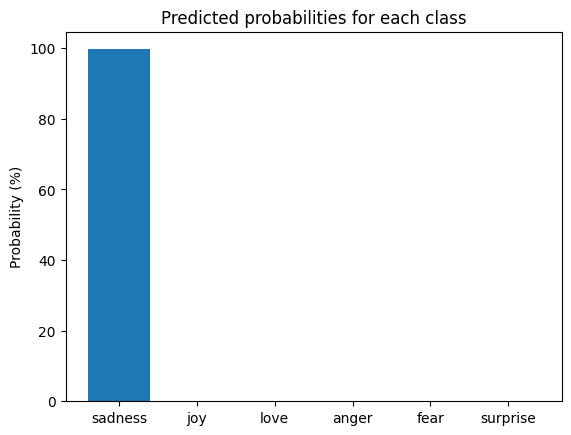

In [62]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color="C0")
plt.title("Predicted probabilities for each class")
plt.ylabel("Probability (%)")
plt.show()